Importing libraries

In [2]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 


from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from functools import reduce

from tcn import TCN, tcn_full_summary

Model architecture

In [4]:

def model_arch(x):
    
    model = Sequential()
    model.add(x(700, input_shape = ( 60, 1))) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

model=model_arch(x=GRU)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 700)               1476300   
_________________________________________________________________
dropout (Dropout)            (None, 700)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 701       
Total params: 1,477,001
Trainable params: 1,477,001
Non-trainable params: 0
_________________________________________________________________


Helper function


In [7]:
def model_train(file_name,model):

      df = pd.read_csv(file_name)
      dfg=df[0:735]



      training_set = df.iloc[:, 4:5].values ## Used dot values to convert Panda Series  to Numpy Array 

      # Feature Scaling
      sc = MinMaxScaler(feature_range = (0, 1))


      training_set_scaled = sc.fit_transform(training_set)
      
      
      # Creating a data structure with 60 time-steps and 1 output
      X_train = []
      y_train = []
      for i in range(60, dfg.shape[0]):
          X_train.append(training_set_scaled[i-60:i, 0])
          y_train.append(training_set_scaled[i, 0])
      X_train, y_train = np.array(X_train), np.array(y_train)
      X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
      X_train.shape
      model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=0)
      return model



In [8]:
model = model_train("AMZN.csv", model)
model = model_train("ADBE.csv", model)
model = model_train("GOOG.csv", model)
model = model_train("CMCSA.csv", model)
model = model_train("INTC.csv", model)
model = model_train("NFLX.csv", model)
model = model_train("MSFT.csv", model)
model = model_train("NVDA.csv", model)
model = model_train("QCOM.csv", model)
model = model_train("TXN.csv", model)

In [9]:
model.save("model.h5")

In [10]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 



APPLE GRU TL 10

(511, 1)
(451, 60, 1)


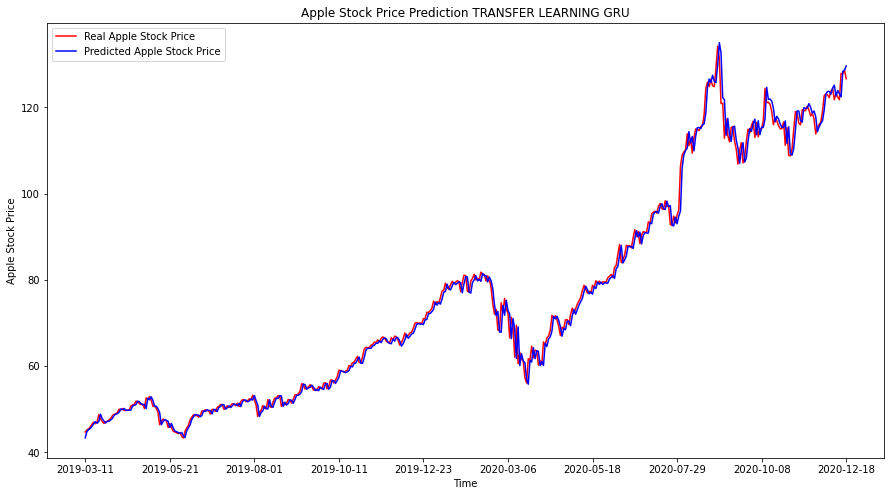

<Figure size 432x288 with 0 Axes>

In [12]:
# load model
model_a = load_model('model.h5')

df=pd.read_csv("AAPL.csv")
dataset_train = df.iloc[:1052, 4:5]
dataset_test = df.iloc[1052:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 511):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model_a.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(451,) 
x = df.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Apple Stock Price")
plt.plot(df.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Apple Stock Price")
plt.xticks(np.arange(0,451,50))
plt.title('Apple Stock Price Prediction TRANSFER LEARNING GRU')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show() 
plt.savefig("Apple TL GRU")


In [13]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse, rmse)

1.321416806561049 2.0356532579234123


FB GRU TL 10

(511, 1)
(451, 60, 1)


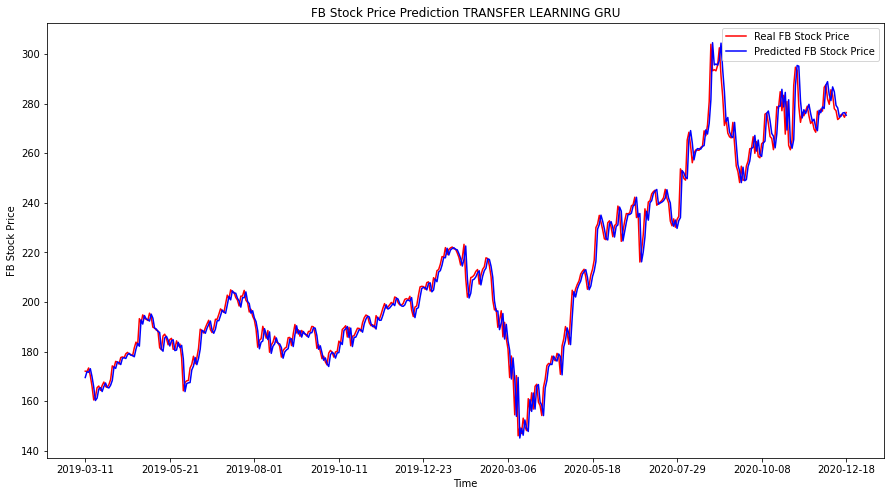

<Figure size 432x288 with 0 Axes>

In [16]:
# load model
model_b = load_model('model.h5', custom_objects={'TCN': TCN})

df=pd.read_csv("FB.csv")
dataset_train = df.iloc[:1052, 4:5]
dataset_test = df.iloc[1052:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 511):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model_a.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(451,) 
x = df.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,451,50))
plt.title('FB Stock Price Prediction TRANSFER LEARNING GRU')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 
plt.savefig("FB TL GRU")

In [15]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.5679667836015447 5.1577486807766


TESLA GRU TL 10

(438, 1)
(378, 60)
(378, 60, 1)


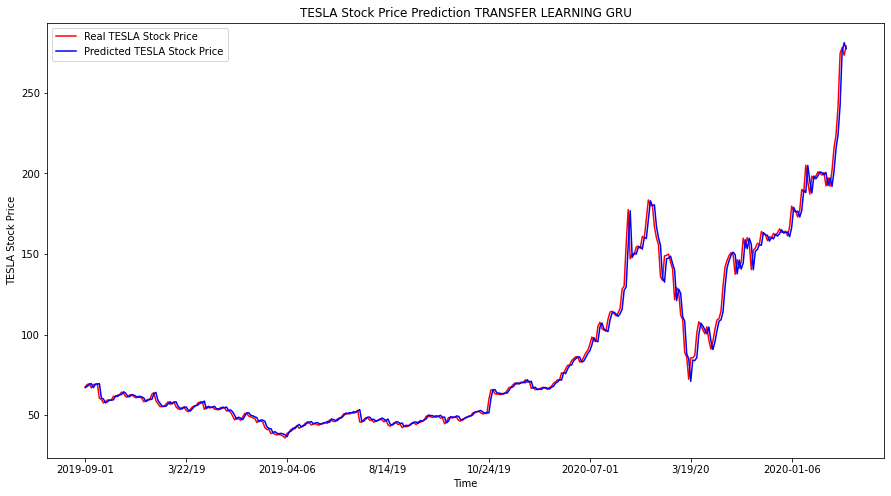

<Figure size 432x288 with 0 Axes>

In [17]:
# load model
model_t = load_model('model.h5', custom_objects={'TCN': TCN})

df=pd.read_csv("TESLA.csv")
dataset_train = df.iloc[:881, 4:5]
dataset_test = df.iloc[881:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 438):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model_a.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction TRANSFER LEARNING GRU')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA TL GRU")

In [18]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

2.9389292984083064 5.405291205085296
